In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pangho
import datetime 
from datetime import *

import interpretable as inter 
import interpretable_linear_data as interData

from datetime import date
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
# dumping parameters

prgs = ['HF_10USNOTE'] # we choose the financial asset using its key
start_date, end_date = '2019-01-03', '2019-01-31' # we choose the considered time interval 
root = '.'

In [3]:
# we generate the script and the files
script, files, dates = interData.get_script(prgs, start_date, end_date, root)

In [4]:
# we create a dictionnary of dataframes, containing the dumped datas for every day of trading

dataframe_collection = {} # it's our dictionnary

for day in dates: # we fill the dictionnary with the dataframe for each day of trading 
    dataframe_collection[day] = pangho.Store(files['HF_10USNOTE', day])['prg:HF_10USNOTE:trades']


In [5]:
# here is an example of the first day of trading that we've dumped 
dataframe_collection[dates[0]].head() 

evt_seq_num                    ts_recv provider source  \
0            1 2019-01-03 00:00:06.614297    ACTIV    CME   
1            2 2019-01-03 00:00:12.624966    ACTIV    CME   
2            3 2019-01-03 00:00:12.625009    ACTIV    CME   
3            4 2019-01-03 00:00:12.625038    ACTIV    CME   
4            5 2019-01-03 00:00:12.627458    ACTIV    CME   

                   ts_market  qty       price side type  volume  ...  \
0 2019-01-03 00:00:06.613767    2  122.703125    A        44018  ...   
1 2019-01-03 00:00:12.621844    8  122.687500    B        44026  ...   
2 2019-01-03 00:00:12.621985    5  122.687500    B        44031  ...   
3 2019-01-03 00:00:12.621987   12  122.687500    B        44043  ...   
4 2019-01-03 00:00:12.623249    8  122.687500    B        44051  ...   

   trade_id order_id status  qualifier condition mmtCodes bid_size       bid  \
0  0x3877a0               0             CBE:0x42    LB,CT      222  122.6875   
1  0x3877aa               0             CBE:0x41    LB,CT      216  122.6875   
2  0x3877ae               0             CBE:0x41    LB,CT      216  122.6875   
3  0x3877b1               0             CBE:0x41    LB,CT      216  122.6875   
4  0x3877bc               0             CBE:0x41    LB,CT      193  122.6875   

          ask  ask_size  
0  122.703125       402  
1  122.703125       396  
2  122.703125       396  
3  122.703125       396  
4  122.703125       398  

[5 rows x 21 columns]

In [6]:
dastart, daend = '2019-01-03 0:00:00', '2019-01-03 23:59:59'

In [7]:
#we select the good trading hours
initial_datetimes = []
final_datetimes = []
i = 0

for day in dates:
    initial_datetimes.append(datetime.combine( datetime.strptime(day, '%Y-%m-%d').date(), datetime.strptime(dastart,'%Y-%m-%d %H:%M:%S').time() ) )
    initial_datetimes[i] = initial_datetimes[i].strftime('%Y-%m-%d %H:%M:%S')
    final_datetimes.append(datetime.combine( datetime.strptime(day, '%Y-%m-%d').date(), datetime.strptime(daend,'%Y-%m-%d %H:%M:%S').time() ) )
    final_datetimes[i] = final_datetimes[i].strftime('%Y-%m-%d %H:%M:%S')
    i += 1
    


In [8]:
final_datetimes

['2019-01-03 23:59:59',
 '2019-01-04 23:59:59',
 '2019-01-07 23:59:59',
 '2019-01-08 23:59:59',
 '2019-01-09 23:59:59',
 '2019-01-10 23:59:59',
 '2019-01-11 23:59:59',
 '2019-01-14 23:59:59',
 '2019-01-15 23:59:59',
 '2019-01-16 23:59:59',
 '2019-01-17 23:59:59',
 '2019-01-18 23:59:59',
 '2019-01-21 23:59:59',
 '2019-01-22 23:59:59',
 '2019-01-23 23:59:59',
 '2019-01-24 23:59:59',
 '2019-01-25 23:59:59',
 '2019-01-28 23:59:59',
 '2019-01-29 23:59:59',
 '2019-01-30 23:59:59',
 '2019-01-31 23:59:59']

In [9]:
# now we want to clean our daily data 

# we set the discriminatory parameters
price_max = 200
price_min = 0
aggregation = True
normalization = True
dastarts, daends = initial_datetimes, final_datetimes
time_bins = '5Mins'
order_type = True

cpt = 0


# we clean the data with our data cleaner 
for day in dates: 
    dataframe_collection[day] = interData.data_cleaner(dataframe_collection[day], price_max, price_min, dastarts[cpt], daends[cpt], time_bins, aggregation, normalization, True)
    cpt += 1

KeyboardInterrupt: 

In [10]:
# we create the returns column shift the dataset and normalize the returns 
for day in dates: 
    #print(len(dataframe_collection[day]))
    dataframe_collection[day]['returns'] = dataframe_collection[day].mid.diff().shift(-1)
    dataframe_collection[day] = dataframe_collection[day][dataframe_collection[day]['returns'].notna()]
    dataframe_collection[day]['returns_normalized'] = dataframe_collection[day]['returns'].div(dataframe_collection[day]['returns'].apply(lambda x: np.square(x)).sum())
    #scaler.fit(dataframe_collection[day]['returns_normalized'].values.reshape(-1,1))
    #print(len(dataframe_collection[day]))


In [11]:
dataframe_collection[dates[0]].tail()

qty  \
sign ts_market_et                     price     condition side        
-1.0 2019-01-03 15:59:51.535074-06:00 123.15625 CBE:0x41  B       1   
     2019-01-03 15:59:52.235263-06:00 123.15625 CBE:0x41  B      22   
     2019-01-03 15:59:53.622946-06:00 123.15625 CBE:0x41  B       1   
     2019-01-03 15:59:55.913009-06:00 123.15625 CBE:0x41  B       1   
     2019-01-03 15:59:59.400340-06:00 123.15625 CBE:0x41  B       1   

                                                                       ask  \
sign ts_market_et                     price     condition side               
-1.0 2019-01-03 15:59:51.535074-06:00 123.15625 CBE:0x41  B     123.171875   
     2019-01-03 15:59:52.235263-06:00 123.15625 CBE:0x41  B     123.171875   
     2019-01-03 15:59:53.622946-06:00 123.15625 CBE:0x41  B     123.171875   
     2019-01-03 15:59:55.913009-06:00 123.15625 CBE:0x41  B     123.171875   
     2019-01-03 15:59:59.400340-06:00 123.15625 CBE:0x41  B     123.171875   

                                                                      bid  \
sign ts_market_et                     price     condition side              
-1.0 2019-01-03 15:59:51.535074-06:00 123.15625 CBE:0x41  B     123.15625   
     2019-01-03 15:59:52.235263-06:00 123.15625 CBE:0x41  B     123.15625   
     2019-01-03 15:59:53.622946-06:00 123.15625 CBE:0x41  B     123.15625   
     2019-01-03 15:59:55.913009-06:00 123.15625 CBE:0x41  B     123.15625   
     2019-01-03 15:59:59.400340-06:00 123.15625 CBE:0x41  B     123.15625   

                                                               side   volume  \
sign ts_market_et                     price     condition side                 
-1.0 2019-01-03 15:59:51.535074-06:00 123.15625 CBE:0x41  B       B  2516403   
     2019-01-03 15:59:52.235263-06:00 123.15625 CBE:0x41  B       B  2516425   
     2019-01-03 15:59:53.622946-06:00 123.15625 CBE:0x41  B       B  2516426   
     2019-01-03 15:59:55.913009-06:00 123.15625 CBE:0x41  B       B  2516427   
     2019-01-03 15:59:59.400340-06:00 123.15625 CBE:0x41  B       B  2516428   

                                                               mmtCodes  \
sign ts_market_et                     price     condition side            
-1.0 2019-01-03 15:59:51.535074-06:00 123.15625 CBE:0x41  B       LB,CT   
     2019-01-03 15:59:52.235263-06:00 123.15625 CBE:0x41  B       LB,CT   
     2019-01-03 15:59:53.622946-06:00 123.15625 CBE:0x41  B       LB,CT   
     2019-01-03 15:59:55.913009-06:00 123.15625 CBE:0x41  B       LB,CT   
     2019-01-03 15:59:59.400340-06:00 123.15625 CBE:0x41  B       LB,CT   

                                                                evt_seq_num  \
sign ts_market_et                     price     condition side                
-1.0 2019-01-03 15:59:51.535074-06:00 123.15625 CBE:0x41  B           84162   
     2019-01-03 15:59:52.235263-06:00 123.15625 CBE:0x41  B           84163   
     2019-01-03 15:59:53.622946-06:00 123.15625 CBE:0x41  B           84164   
     2019-01-03 15:59:55.913009-06:00 123.15625 CBE:0x41  B           84165   
     2019-01-03 15:59:59.400340-06:00 123.15625 CBE:0x41  B           84166   

                                                                                  ts_recv  \
sign ts_market_et                     price     condition side                              
-1.0 2019-01-03 15:59:51.535074-06:00 123.15625 CBE:0x41  B    2019-01-03 21:59:51.535453   
     2019-01-03 15:59:52.235263-06:00 123.15625 CBE:0x41  B    2019-01-03 21:59:52.235814   
     2019-01-03 15:59:53.622946-06:00 123.15625 CBE:0x41  B    2019-01-03 21:59:53.644622   
     2019-01-03 15:59:55.913009-06:00 123.15625 CBE:0x41  B    2019-01-03 21:59:55.913416   
     2019-01-03 15:59:59.400340-06:00 123.15625 CBE:0x41  B    2019-01-03 21:59:59.400791   

                                                               provider  \
sign ts_market_et                     price     condition side            
-1.0 2019-01-03 15:59:51.535074-06:0

In [12]:
# we concatenate the daily data after the aggregation and the normalization
df = dataframe_collection[dates[0]].copy()
for day in dates[1:]:
    df = pd.concat( (df, dataframe_collection[day].copy()) )

In [13]:
df

qty  \
sign ts_market_et                     price      condition side        
 1.0 2019-01-03 07:00:07.329035-06:00 122.359375 CBE:0x42  A       1   
     2019-01-03 07:00:28.244372-06:00 122.359375 CBE:0x42  A     102   
-1.0 2019-01-03 07:00:29.028839-06:00 122.343750 CBE:0x41  B      20   
     2019-01-03 07:00:30.002732-06:00 122.343750 CBE:0x41  B     142   
     2019-01-03 07:00:31.521417-06:00 122.343750 CBE:0x41  B      19   
...                                                              ...   
     2019-01-31 15:59:30.093901-06:00 122.453125 CBE:0x41  B      13   
 1.0 2019-01-31 15:59:35.531330-06:00 122.468750 CBE:0x42  A       1   
     2019-01-31 15:59:35.982664-06:00 122.468750 CBE:0x42  A      98   
     2019-01-31 15:59:46.606898-06:00 122.468750 CBE:0x42  A      14   
-1.0 2019-01-31 15:59:46.762568-06:00 122.453125 CBE:0x41  B      10   

                                                                        ask  \
sign ts_market_et                     price      condition side               
 1.0 2019-01-03 07:00:07.329035-06:00 122.359375 CBE:0x42  A     122.359375   
     2019-01-03 07:00:28.244372-06:00 122.359375 CBE:0x42  A     122.359375   
-1.0 2019-01-03 07:00:29.028839-06:00 122.343750 CBE:0x41  B     122.359375   
     2019-01-03 07:00:30.002732-06:00 122.343750 CBE:0x41  B     122.359375   
     2019-01-03 07:00:31.521417-06:00 122.343750 CBE:0x41  B     122.359375   
...                                                                     ...   
     2019-01-31 15:59:30.093901-06:00 122.453125 CBE:0x41  B     122.468750   
 1.0 2019-01-31 15:59:35.531330-06:00 122.468750 CBE:0x42  A     122.468750   
     2019-01-31 15:59:35.982664-06:00 122.468750 CBE:0x42  A     122.468750   
     2019-01-31 15:59:46.606898-06:00 122.468750 CBE:0x42  A     122.468750   
-1.0 2019-01-31 15:59:46.762568-06:00 122.453125 CBE:0x41  B     122.468750   

                                                                        bid  \
sign ts_market_et                     price      condition side               
 1.0 2019-01-03 07:00:07.329035-06:00 122.359375 CBE:0x42  A     122.343750   
     2019-01-03 07:00:28.244372-06:00 122.359375 CBE:0x42  A     122.343750   
-1.0 2019-01-03 07:00:29.028839-06:00 122.343750 CBE:0x41  B     122.343750   
     2019-01-03 07:00:30.002732-06:00 122.343750 CBE:0x41  B     122.343750   
     2019-01-03 07:00:31.521417-06:00 122.343750 CBE:0x41  B     122.343750   
...                                                                     ...   
     2019-01-31 15:59:30.093901-06:00 122.453125 CBE:0x41  B     122.453125   
 1.0 2019-01-31 15:59:35.531330-06:00 122.468750 CBE:0x42  A     122.453125   
     2019-01-31 15:59:35.982664-06:00 122.468750 CBE:0x42  A     122.453125   
     2019-01-31 15:59:46.606898-06:00 122.468750 CBE:0x42  A     122.453125   
-1.0 2019-01-31 15:59:46.762568-06:00 122.453125 CBE:0x41  B     122.453125   

                                                                side   volume  \
sign ts_market_et                     price      condition side                 
 1.0 2019-01-03 07:00:07.329035-06:00 122.359375 CBE:0x42  A       A   455341   
     2019-01-03 07:00:28.244372-06:00 122.359375 CBE:0x42  A       A   455443   
-1.0 2019-01-03 07:00:29.028839-06:00 122.343750 CBE:0x41  B       B   455463   
     2019-01-03 07:00:30.002732-06:00 122.343750 CBE:0x41  B       B   455605   
     2019-01-03 07:00:31.521417-06:00 122.343750 CBE:0x41  B       B   455624   
...                                                              ...      ...   
     2019-01-31 15:59:30.093901-06:00 122.453125 CBE:0x41  B       B  1796720   
 1.0 2019-01-31 15:59:35.531330-06:00 122.468750 CBE:0x42  A       A  1796721   
     2019-01-31 15:59:35.982664-06:00 122.468750 CBE:0x42  A       A  1796823   
     2019-01-31 15:59:46.606898-06:00 122.468750 CBE:0x42  A       A  1796837   
-1.0 2019-01-31 15:59:46.762568-06:00 122.453125 CBE:0x41  B       B  1796847   

                  

In [14]:
#df.to_csv('january_data_2019.csv')

In [15]:
%store df

Stored 'df' (DataFrame)


In [16]:
df['mid'].plot()

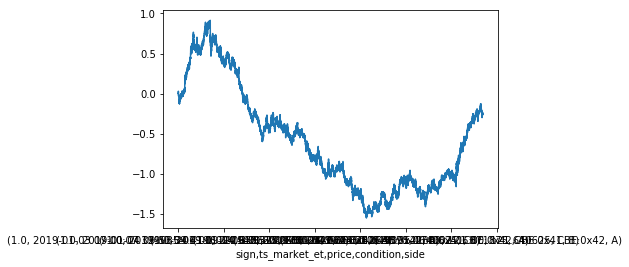

In [17]:
df['returns'].cumsum().plot()

In [18]:
len(df.returns)

668482

In [19]:
len(df.mid)

668482

In [20]:
df.returns.isna()

sign  ts_market_et                      price       condition  side
 1.0  2019-01-03 07:00:07.329035-06:00  122.359375  CBE:0x42   A       False
      2019-01-03 07:00:28.244372-06:00  122.359375  CBE:0x42   A       False
-1.0  2019-01-03 07:00:29.028839-06:00  122.343750  CBE:0x41   B       False
      2019-01-03 07:00:30.002732-06:00  122.343750  CBE:0x41   B       False
      2019-01-03 07:00:31.521417-06:00  122.343750  CBE:0x41   B       False
                                                                       ...  
      2019-01-31 15:59:30.093901-06:00  122.453125  CBE:0x41   B       False
 1.0  2019-01-31 15:59:35.531330-06:00  122.468750  CBE:0x42   A       False
      2019-01-31 15:59:35.982664-06:00  122.468750  CBE:0x42   A       False
      2019-01-31 15:59:46.606898-06:00  122.468750  CBE:0x42   A       False
-1.0  2019-01-31 15:59:46.762568-06:00  122.453125  CBE:0x41   B       False
Name: returns, Length: 668482, dtype: bool

In [21]:
df.qty_signed_normalized

sign  ts_market_et                      price       condition  side
 1.0  2019-01-03 07:00:07.329035-06:00  122.359375  CBE:0x42   A       0.008455
      2019-01-03 07:00:28.244372-06:00  122.359375  CBE:0x42   A       0.862361
-1.0  2019-01-03 07:00:29.028839-06:00  122.343750  CBE:0x41   B      -0.169090
      2019-01-03 07:00:30.002732-06:00  122.343750  CBE:0x41   B      -1.200542
      2019-01-03 07:00:31.521417-06:00  122.343750  CBE:0x41   B      -0.160636
                                                                         ...   
      2019-01-31 15:59:30.093901-06:00  122.453125  CBE:0x41   B      -0.082926
 1.0  2019-01-31 15:59:35.531330-06:00  122.468750  CBE:0x42   A       0.006379
      2019-01-31 15:59:35.982664-06:00  122.468750  CBE:0x42   A       0.625135
      2019-01-31 15:59:46.606898-06:00  122.468750  CBE:0x42   A       0.089305
-1.0  2019-01-31 15:59:46.762568-06:00  122.453125  CBE:0x41   B      -0.063789
Name: qty_signed_normalized, Length: 668482, dtype: 

In [9]:
def data_cleaner2(trades_dict, price_max, price_min):
    
    '''
    trades: a dataframe that contains all the data dumped with get_script
    
    we want to clean the data: 
        - add mid price column, sign column, and a qty signed column 
        - change the time from UTC to chicago/america 
        - get rid of non-reasonable bid-ask spreads, non reasonable prices ( 0 < Price < 200 )
        - Merge trades triggered by the same market order 
        - select the most efficient time interval (liquidity + enough data)
    We could try to normalize the data: for this we propose a normalized mode and a non-normalized mode. 
    ''' 
    cpt = 0
    for day in dates:
        trades_dict[day]['mid'] = 0.5 * (trades_dict[day]['bid'] + trades_dict[day]['ask'])
        trades_dict[day]['sign'] = np.sign(trades_dict[day]['price'] - trades_dict[day]['mid'])
        trades_dict[day]['qty_signed'] = trades_dict[day]['qty'] * trades_dict[day]['sign']
        trades_dict[day]['ts_market_et'] = trades_dict[day]['ts_market'].dt.tz_localize('UTC').dt.tz_convert('America/Chicago')
        trades_dict[day] = trades_dict[day].loc[(trades_dict[day]['price'] > price_min) 
                                                & (trades_dict[day]['price'] < price_max)]
        cpt += trades_dict[day].shape[0]
        trades_dict[day] = trades_dict[day][trades_dict[day]['ask'] > trades_dict[day]['bid']]
        trades_dict[day] = trades_dict[day].groupby(['sign', 'ts_market_et',
                 'price', 'condition', 'side']).agg({'qty': 'sum', 'ask': 'first',
                                               'bid': 'first',
                                               'volume':'first', 'mmtCodes': 'first', 
                                               'evt_seq_num': 'first', 'ts_recv': 'first', 
                                               'provider': 'first', 'source': 'first', 
                                               'ts_market': 'first', 'type': 'first', 
                                               'bid_size': 'first', 'ask_size': 'first', 
                                               'mid': 'first', 'qty_signed': 'sum',
                                               'volume': 'last', 'vwap': 'first', 
                                                'trade_id': 'first', 'order_id': 'first'}) 
        trades_dict[day] = trades_dict[day].sort_values(by = ['ts_recv', 'evt_seq_num'])
        
        trades_dict[day]['returns'] =  trades_dict[day].mid.diff().shift(-1)
        trades_dict[day] =  trades_dict[day][ trades_dict[day]['returns'].notna()]
        

    df = trades_dict[dates[0]].copy()
    for day in dates[1:]:
        df = pd.concat( (df, trades_dict[day]) )
        
    df["hour"] = df["ts_recv"].dt.hour
    df["qty_signed_squared"] = df["qty_signed"]**2
    
    dfnew = df.groupby(['hour']).agg({'qty_signed_squared': 'sum'})
    dfnew['qty_signed_squared'] = dfnew['qty_signed_squared']
    dfnew.reset_index(inplace = True)
    
    df = pd.merge(df, dfnew, right_on = 'hour', left_on = 'hour', how = 'left' )
        
    df['qty_signed'] = df['qty_signed'].div(df['qty_signed_squared_y'])
    
    #df = df.drop(columns=['qty_signed_squared_x', 'qty_signed_squared_y', 'hour'])
    df = df.drop(columns=['qty_signed_squared_x', 'qty_signed_squared_y'])
    
    print(cpt)
    print(df.shape[0])
    
    return df

In [9]:
dataf = interData.data_cleaner2(dataframe_collection, 200, 0 , dates)

977961
959972


In [10]:
dataf.shape

(959972, 20)

In [11]:
dataf.dropna(inplace = True)

In [12]:
%store dataf

Stored 'dataf' (DataFrame)


In [13]:
dataf.isnull().sum(axis = 0)

qty            0
ask            0
bid            0
volume         0
mmtCodes       0
evt_seq_num    0
ts_recv        0
provider       0
source         0
ts_market      0
type           0
bid_size       0
ask_size       0
mid            0
qty_signed     0
vwap           0
trade_id       0
order_id       0
returns        0
hour           0
dtype: int64